In [1]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

In [3]:
path = r'C:\Users\maria\OneDrive\Área de Trabalho\Eletiva de Dados\Atividades\11\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv'

df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_COR_RACA'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)

df.info()  # uso de memória estimado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   TP_COR_RACA  int64
dtypes: int64(1)
memory usage: 38.9 MB


In [5]:
df_temp = df['TP_COR_RACA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})
df_temp

TP_COR_RACA
Parda            0.463971
Branca           0.359507
Preta            0.127238
Amarela          0.022797
Não declarado    0.020254
Indígena         0.006233
Name: proportion, dtype: float64

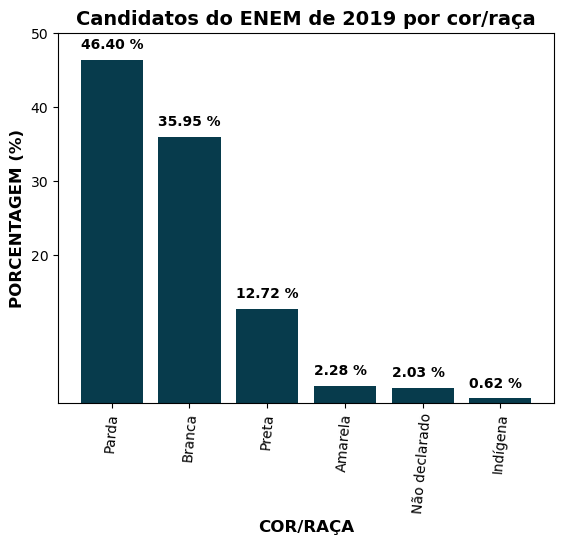

In [7]:
# Fazer gráfico completo de barras de inscritos por cor/raça

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2019 por cor/raça", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "COR/RAÇA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+1))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

In [21]:
path = r'C:\Users\maria\OneDrive\Área de Trabalho\Eletiva de Dados\Atividades\11\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_SEXO'] # IMPORTANTE: ler só a coluna TP_SEXO
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   TP_SEXO  object
dtypes: object(1)
memory usage: 38.9+ MB


In [23]:
df_temp = df['TP_SEXO'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    "F": "Feminino",
    "M": "Masculino",
})
df_temp

TP_SEXO
Feminino     0.595026
Masculino    0.404974
Name: proportion, dtype: float64

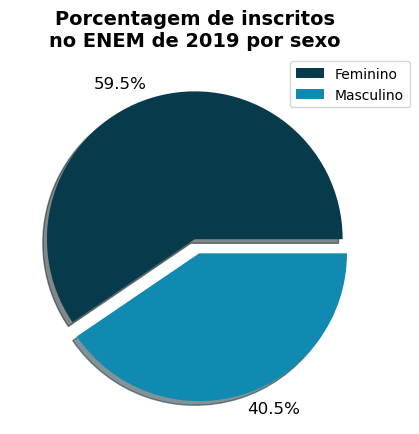

In [25]:
# Fazer gráfico completo de pizza de inscritos por sexo

## Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1])],              # Rótulo do 2º setor
    colors=["#073B4C", "#118AB2"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2019 por sexo", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()

In [27]:
path = r'C:\Users\maria\OneDrive\Área de Trabalho\Eletiva de Dados\Atividades\11\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['Q006']        # IMPORTANTE: ler só a coluna Q006
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Q006    object
dtypes: object(1)
memory usage: 38.9+ MB


In [29]:
df_temp = df["Q006"].value_counts(normalize=True)
renda_map = {
    "A": "Nenhuma renda.",
    "B": "Até R$ 937,00.",
    "C": "De R$ 937,01 até R$ 1.405,50.",
    "D": "De R$ 1.405,51 até R$ 1.874,00.",
    "E": "De R$ 1.874,01 até R$ 2.342,50.",
    "F": "De R$ 2.342,51 até R$ 2.811,00.",
    "G": "De R$ 2.811,01 até R$ 3.748,00.",
    "H": "De R$ 3.748,01 até R$ 4.685,00.",
    "I": "De R$ 4.685,01 até R$ 5.622,00.",
    "J": "De R$ 5.622,01 até R$ 6.559,00.",
    "K": "De R$ 6.559,01 até R$ 7.496,00.",
    "L": "De R$ 7.496,01 até R$ 8.433,00.",
    "M": "De R$ 8.433,01 até R$ 9.370,00.",
    "N": "De R$ 9.370,01 até R$ 11.244,00.",
    "O": "De R$ 11.244,01 até R$ 14.055,00.",
    "P": "De R$ 14.055,01 até R$ 18.740,00.",
    "Q": "Mais de R$ 18.740,00."
}
df_temp.index = df_temp.index.map(renda_map)
df_temp = df_temp.reindex(renda_map.values())
df_temp

Q006
Nenhuma renda.                       0.045547
Até R$ 937,00.                       0.249889
De R$ 937,01 até R$ 1.405,50.        0.257390
De R$ 1.405,51 até R$ 1.874,00.      0.098056
De R$ 1.874,01 até R$ 2.342,50.      0.093334
De R$ 2.342,51 até R$ 2.811,00.      0.044405
De R$ 2.811,01 até R$ 3.748,00.      0.059255
De R$ 3.748,01 até R$ 4.685,00.      0.037860
De R$ 4.685,01 até R$ 5.622,00.      0.028193
De R$ 5.622,01 até R$ 6.559,00.      0.015856
De R$ 6.559,01 até R$ 7.496,00.      0.011388
De R$ 7.496,01 até R$ 8.433,00.      0.008672
De R$ 8.433,01 até R$ 9.370,00.      0.008498
De R$ 9.370,01 até R$ 11.244,00.     0.012099
De R$ 11.244,01 até R$ 14.055,00.    0.009853
De R$ 14.055,01 até R$ 18.740,00.    0.008489
Mais de R$ 18.740,00.                0.011216
Name: proportion, dtype: float64

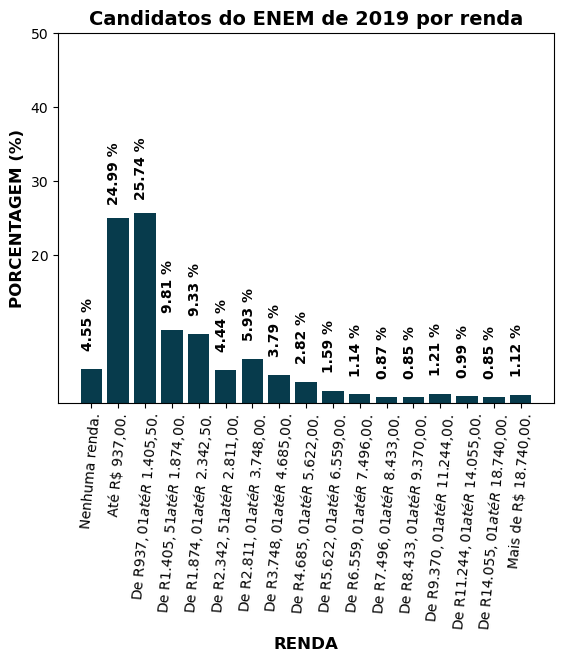

In [31]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2019 por renda",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+3))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.06,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

In [33]:
path = r'C:\Users\maria\OneDrive\Área de Trabalho\Eletiva de Dados\Atividades\11\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_FAIXA_ETARIA']        # IMPORTANTE: ler só a coluna Q006
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 1 columns):
 #   Column           Dtype
---  ------           -----
 0   TP_FAIXA_ETARIA  int64
dtypes: int64(1)
memory usage: 38.9 MB


In [35]:
df_temp = df["TP_FAIXA_ETARIA"].value_counts(normalize=True)
idade_map = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}
df_temp.index = df_temp.index.map(idade_map)
df_temp = df_temp.reindex(idade_map.values())
df_temp

TP_FAIXA_ETARIA
Menor de 17 anos      0.078635
17 anos               0.166292
18 anos               0.169605
19 anos               0.113275
20 anos               0.080346
21 anos               0.056977
22 anos               0.045736
23 anos               0.036835
24 anos               0.030668
25 anos               0.025129
Entre 26 e 30 anos    0.079247
Entre 31 e 35 anos    0.046131
Entre 36 e 40 anos    0.031195
Entre 41 e 45 anos    0.018317
Entre 46 e 50 anos    0.010977
Entre 51 e 55 anos    0.006121
Entre 56 e 60 anos    0.002894
Entre 61 e 65 anos    0.001104
Entre 66 e 70 anos    0.000377
Maior de 70 anos      0.000141
Name: proportion, dtype: float64

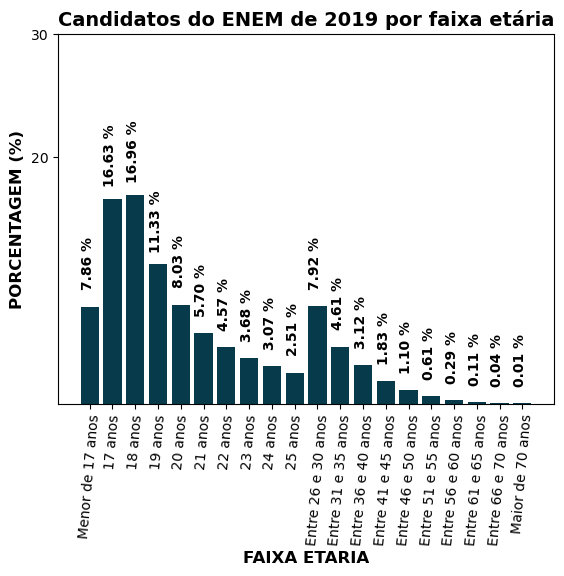

In [37]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2019 por faixa etária",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "FAIXA ETARIA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+2))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.035,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

In [39]:
path = r'C:\Users\maria\OneDrive\Área de Trabalho\Eletiva de Dados\Atividades\11\microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=[
        'TP_FAIXA_ETARIA', 'Q006', 'TP_SEXO',  'TP_COR_RACA',
        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_COR_RACA      int64  
 3   NU_NOTA_CN       float64
 4   NU_NOTA_CH       float64
 5   NU_NOTA_LC       float64
 6   NU_NOTA_MT       float64
 7   NU_NOTA_REDACAO  float64
 8   Q006             object 
dtypes: float64(5), int64(2), object(2)
memory usage: 349.9+ MB


In [41]:
# Criar a coluna de nota final fazendo a média das notas em cada competência mais a redação
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + \
                   df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + \
                   + df['NU_NOTA_REDACAO'] ) / 5

In [43]:
# Considerar apenas linhas onde a nota não seja nula
df = df[df['NOTA_FINAL'].notna()]

In [45]:
# remover warning
pd.options.mode.chained_assignment = None

# Filtrar com apenas faixas etárias não agrupadas
df_temp = df[(df['TP_FAIXA_ETARIA']<=10) & (df['TP_FAIXA_ETARIA']>=2)]

# Converter categoria numérica para categoria textual
df_temp['TP_FAIXA_ETARIA'] = df_temp['TP_FAIXA_ETARIA'].map(lambda x: x + 15)
df_temp['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
17    744684
18    709745
19    430184
20    285413
21    191301
22    147225
23    114240
24     92096
25     73272
Name: count, dtype: int64

In [47]:
# Agrupar as notas por idade e agregar pela média
df_group = df_temp.groupby('TP_FAIXA_ETARIA').agg({"NOTA_FINAL": 'mean'})
df_group

,NOTA_FINAL
TP_FAIXA_ETARIA,
17,534.819805
18,528.110050
19,522.936383
20,518.874268
21,517.349476
22,514.852969
23,513.052393
24,512.054016
25,510.940478


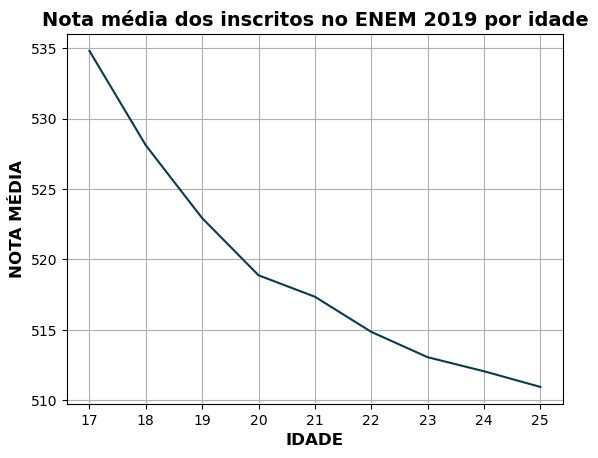

In [49]:
# Definindo x e y
x = df_group['NOTA_FINAL'].index
y = df_group['NOTA_FINAL'].values

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média dos inscritos no ENEM 2019 por idade", # Texto
    fontsize=14,                                       # Fonte de tamanho 14
    fontweight='bold'                                  # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:41: SyntaxWarning: invalid escape sequence '\$'
<>:42: SyntaxWarning: invalid escape sequence '\$'
<>:43: SyntaxWarning: invalid escape sequence '\$'
<>:44: SyntaxWarning: invalid escape sequence '\$'
<>:45: SyntaxWarning: invalid escape sequence '\$'
<>:46: SyntaxWarning: invalid escape sequence '\$'
<>:47: SyntaxWarning: invalid escape sequence '\$'
<>:48: SyntaxWarning: invalid escape sequence '\$'
<>:49: SyntaxWarning: invalid escape sequence '\$'
<>:50: SyntaxWarning: invalid escape sequence '\$'
<>:51: SyntaxWarning: invalid escape sequence '\$'
<>:52: SyntaxWarning: invalid escape sequence '\$'
<>:53: SyntaxWarning: invalid escape sequence '\$'
<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:40: SyntaxWarning: invalid escape sequence '\$'
<>:41: SyntaxWarning: invalid e

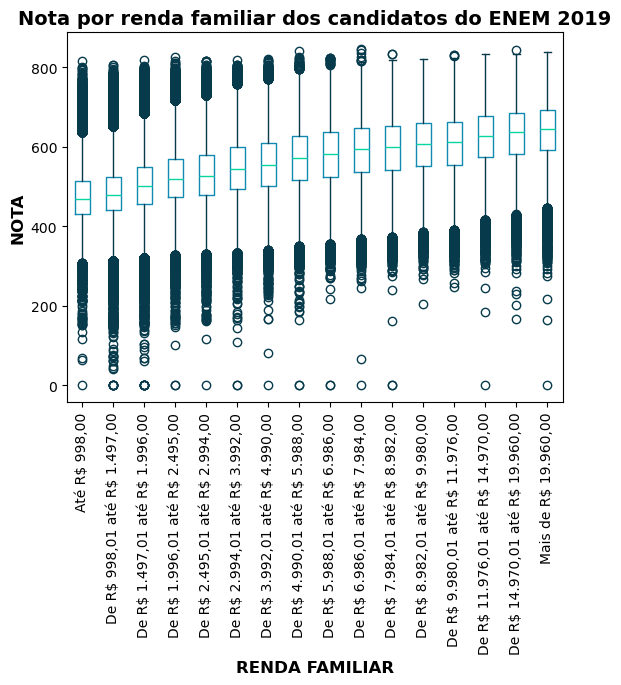

In [51]:
# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
xs = []
ys = []
for letter in sorted(df['Q006'].unique()[:-1]): # elimiando o nan
    xs.append(df[df['Q006'] == letter]['NOTA_FINAL'].values)

# Criando o gráfico
plt.boxplot(xs,
    boxprops=dict(color="#118AB2"),                               # Caixa
    capprops=dict(color="#073B4C"),                               # Linha horizontal
    whiskerprops=dict(color="#073B4C"),                           # Linha vertical
    flierprops=dict(color="#118AB2", markeredgecolor="#073B4C"),  # Outliers
    medianprops=dict(color="#06D6A0"),                            # Mediana
)

# Propriedades gerais
## Título
plt.title(
    "Nota por renda familiar dos candidatos do ENEM 2019", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA FAMILIAR", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

## Marcações do eixo horizontal
plt.xticks(list(range(1,17)), [
    'Até R\$ 998,00',
    'De R\$ 998,01 até R\$ 1.497,00',
    'De R\$ 1.497,01 até R\$ 1.996,00',
    'De R\$ 1.996,01 até R\$ 2.495,00',
    'De R\$ 2.495,01 até R\$ 2.994,00',
    'De R\$ 2.994,01 até R\$ 3.992,00',
    'De R\$ 3.992,01 até R\$ 4.990,00',
    'De R\$ 4.990,01 até R\$ 5.988,00',
    'De R\$ 5.988,01 até R$ 6.986,00',
    'De R\$ 6.986,01 até R\$ 7.984,00',
    'De R\$ 7.984,01 até R\$ 8.982,00',
    'De R\$ 8.982,01 até R\$ 9.980,00',
    'De R\$ 9.980,01 até R\$ 11.976,00',
    'De R\$ 11.976,01 até R\$ 14.970,00',
    'De R\$ 14.970,01 até R\$ 19.960,00',
    'Mais de R\$ 19.960,00'
], rotation=90, fontsize=10)

plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_3924\2050815592.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


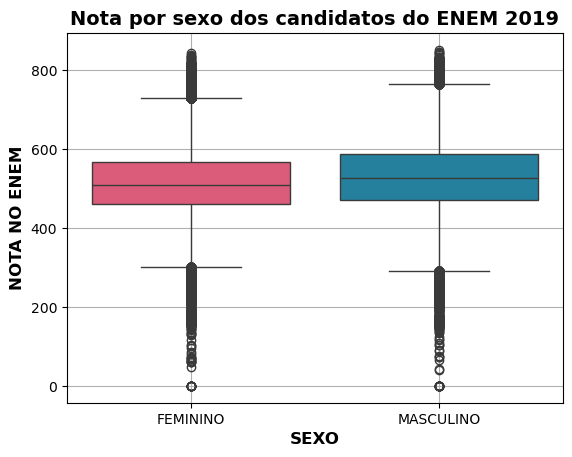

In [53]:
sns.boxplot(
    data=df, 
    x="TP_SEXO",
    y="NOTA_FINAL", 
    palette=['#EF476F', '#118AB2'])

# Propriedades gerais
## Título
plt.title(
    "Nota por sexo dos candidatos do ENEM 2019", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
plt.xticks([0,1], ['FEMININO', 'MASCULINO'])
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA NO ENEM", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.grid('on')

plt.show()

In [55]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})

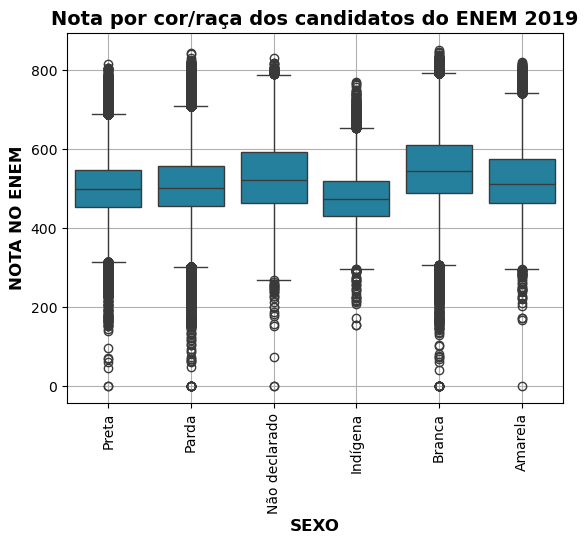

In [57]:
my_order = df.groupby(by=["TP_COR_RACA"])["NOTA_FINAL"].median().iloc[::-1].index

sns.boxplot(
    data=df,
    color="#118AB2",
    x="TP_COR_RACA",
    order=my_order,
    y="NOTA_FINAL")

# Propriedades gerais
## Título
plt.title(
    "Nota por cor/raça dos candidatos do ENEM 2019", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
plt.xticks(rotation=90)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA NO ENEM", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.grid('on')

plt.show()